In [2]:
import numpy as np
from matplotlib import pyplot as plt, tri as tri
import numpy.linalg as linalg
from scipy.spatial import Delaunay

In [27]:
from IPython.display import display, Math
def print_matrix(array):
    matrix = ''
    for row in array:
        try:
            for number in row:
                matrix += f'{round(number,4)}&'
        except TypeError:
            matrix += f'{row}&'
        matrix = matrix[:-1] + r'\\'
    display(Math(r'\begin{bmatrix}'+matrix+r'\end{bmatrix}'))

# 1-Point-Alignment

$$
M_T=\begin{pmatrix}
1 & 0 & \Delta_x\\
0 & 1 & \Delta_y\\
0 & 0 & 1
\end{pmatrix}
$$

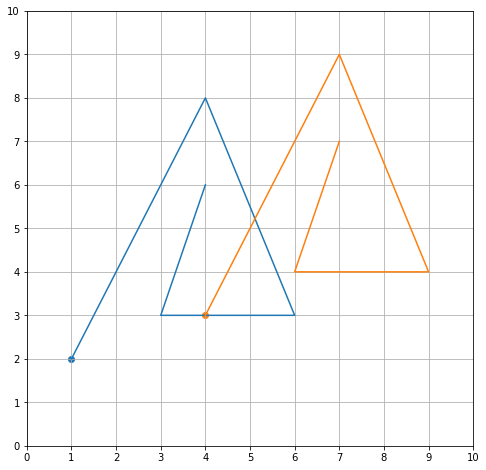

In [10]:
A = np.array([[1,2]])
B = np.array([[4,3]])

# translation only
M1=np.array([[1, 0, B[0][0] - A[0][0]], [0, 1, B[0][1] - A[0][1]], [0, 0, 1]])
#M1=np.array([[1, 0, 0], [B[0][0] - A[0][0], 1, 0], [B[0][1] - A[0][1], 0, 1]])

C = np.array([[1,2, 1],[4,8, 1], [6,3, 1], [3, 3, 1], [4, 6, 1]])
K = np.einsum('...ij,...j', M1, C)

fig, axs = plt.subplots(1, 1, figsize=(8, 8))
axs.scatter(A.T[0], A.T[1])
axs.scatter(B.T[0], B.T[1])

axs.plot(C.T[0], C.T[1])
axs.plot(K.T[0], K.T[1])
axs.set_xlim(0, 10)
axs.set_ylim(0, 10)
axs.grid(True);
axs.set_xticks(np.linspace(0,10,11));
axs.set_yticks(np.linspace(0,10,11));

In [11]:
print_matrix(M1)

<IPython.core.display.Math object>

# 2-Point-Alignment

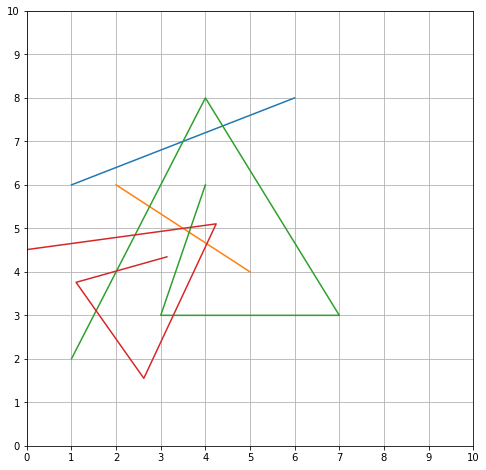

In [14]:
A = np.array([[1,6], [6,8]])
B = np.array([[2,6], [5,4]])

# add 3rd point for matrix calculation
A2 = np.append(A, [[A[1][0] + (A[1] - A[0])[1], A[1][1] - (A[1] - A[0])[0]]], axis=0)
B2 = np.append(B, [[B[1][0] + (B[1] - B[0])[1], B[1][1] - (B[1] - B[0])[0]]], axis=0)

# add 3rd dimension
A2 = np.append(A2, np.ones((np.shape(A2)[0],1)), axis=1)
B2 = np.append(B2, np.ones((np.shape(B2)[0],1)), axis=1)

M2=B2.T@np.linalg.inv(A2.T)

C = np.array([[1,2, 1],[4,8, 1], [7,3, 1], [3, 3, 1], [4, 6, 1]])
K = np.einsum('...ij,...j', M2, C)

fig, axs = plt.subplots(1, 1, figsize=(8, 8))
axs.plot(A.T[0], A.T[1])
axs.plot(B.T[0], B.T[1])

axs.plot(C.T[0], C.T[1])
axs.plot(K.T[0], K.T[1])

axs.set_xlim(0, 10)
axs.set_ylim(0, 10)
axs.grid(True);
axs.set_xticks(np.linspace(0,10,11));
axs.set_yticks(np.linspace(0,10,11));

In [6]:
print_matrix(M2)

<IPython.core.display.Math object>

# 3-Point-Alignment

[[2.         1.         1.        ]
 [3.5        5.5        1.        ]
 [9.27777778 2.05555556 1.        ]
 [4.16666667 1.83333333 1.        ]
 [4.27777778 4.05555556 1.        ]
 [8.61111111 5.72222222 1.        ]]


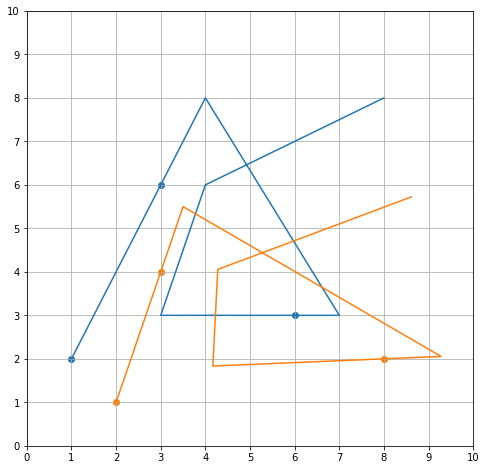

In [3]:
A = np.array([[1,2], [6,3], [3,6]])
B = np.array([[2,1], [8,2], [3,4]])

# add 3rd dimension
A3 = np.append(A, np.ones((np.shape(A)[0],1)), axis=1)
B3 = np.append(B, np.ones((np.shape(B)[0],1)), axis=1)

M3=B3.T@np.linalg.inv(A3.T)

C = np.array([[1,2, 1],[4,8, 1], [7,3, 1], [3, 3, 1], [4, 6, 1], [8, 8, 1]])
K = np.einsum('...ij,...j', M3, C)

fig, axs = plt.subplots(1, 1, figsize=(8, 8))
axs.scatter(A.T[0], A.T[1])
axs.scatter(B.T[0], B.T[1])

axs.plot(C.T[0], C.T[1])
axs.plot(K.T[0], K.T[1])
axs.set_xlim(0, 10)
axs.set_ylim(0, 10)
axs.grid(True);
axs.set_xticks(np.linspace(0,10,11));
axs.set_yticks(np.linspace(0,10,11));
print(K)

In [26]:
print_matrix(M3)

NameError: name 'print_matrix' is not defined

# n-Point-Alignment

[[ 1.  8.]
 [ 4.  7.]
 [10.  5.]
 [ 5.  1.]
 [ 3.  5.]]
[[4 3 2]
 [1 4 2]
 [3 4 0]
 [4 1 0]]


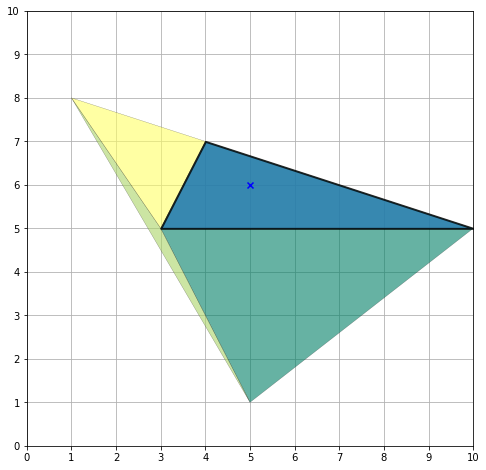

In [4]:
np.random.seed(7)
actual = np.round(np.random.rand(5,2) * 10) 
print(actual)
# add 3rd dimension
actual3 = np.append(actual, np.ones((np.shape(actual)[0],1)), axis=1)

#tri_actual = tri.Triangulation(actual3[0], actual3[1]) #Delaunay(actual)
tri_actual = Delaunay(actual)
print(tri_actual.simplices)

fig, axs = plt.subplots(1, 1, figsize=(8, 8))

#axs.triplot(actual[:,0], actual[:,1], tri_actual.simplices)
#axs.tripcolor(actual[:,0], actual[:,1], tri_actual.simplices, facecolors=np.random.rand(np.shape(tri_actual.simplices)[0]), edgecolors='k')
#axs.tripcolor(actual[:,0], actual[:,1], tri_actual.simplices, cmap='tab10', facecolors=np.random.rand(np.shape(tri_actual.simplices)[0]), edgecolors='k')
axs.tripcolor(actual[:,0], actual[:,1], tri_actual.simplices, cmap='summer', alpha=0.6, facecolors=np.linspace(0, 1, np.shape(tri_actual.simplices)[0]), edgecolors='k')
#axs.scatter(actual.T[0], actual.T[1])

sample_point = np.array([(5,6)])
sample_tri = tri_actual.find_simplex(sample_point)[0]
if sample_tri >= 0:
    axs.tripcolor(actual[:,0], actual[:,1], [tri_actual.simplices[sample_tri]], cmap='tab10', alpha=0.8, facecolors=np.array([0]), edgecolors='k', linewidth=2)
    
axs.scatter(sample_point.T[0], sample_point.T[1], c='b', marker='x')

axs.set_xlim(0, 10)
axs.set_ylim(0, 10)
axs.set_axisbelow(True)
axs.grid(True);
axs.set_xticks(np.linspace(0,10,11));
axs.set_yticks(np.linspace(0,10,11));

# Distance to Triangle

[3.33333333 3.66666667]
4.642796092394707


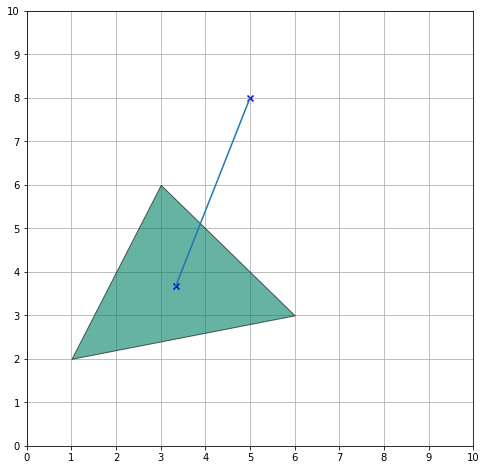

In [48]:
actual = np.array([[1,2], [6,3], [3,6]])
fig, axs = plt.subplots(1, 1, figsize=(8, 8))

axs.tripcolor(actual[:,0], actual[:,1], np.array([[0,1,2]]), cmap='summer', alpha=0.6, facecolors=np.array([0]), edgecolors='k', linewidth=1)

center = np.mean(actual, axis=0)
print(center)

sample_point = np.array([5,8])
axs.scatter(sample_point[0], sample_point[1], c='b', marker='x')
axs.scatter(center[0], center[1], c='b', marker='x')

axs.plot([center[0], sample_point[0]], [center[1], sample_point[1]])

dist = np.linalg.norm(sample_point-center)
print(dist)

axs.set_xlim(0, 10)
axs.set_ylim(0, 10)
axs.set_axisbelow(True)
axs.grid(True);
axs.set_xticks(np.linspace(0,10,11));
axs.set_yticks(np.linspace(0,10,11));

# n-Point-Alignment on a Sphere

In [10]:
%matplotlib widget
fig = plt.figure(figsize=plt.figaspect(1) * 1.5)
ax = fig.add_subplot(projection='3d')

# Make data
u = np.linspace(0, 2 * np.pi, 19)
v = np.linspace(0, np.pi, 19)

theta, phi = np.meshgrid(u, v)
R = 1
x = R * np.sin(phi) * np.cos(theta)
y = R * np.sin(phi) * np.sin(theta)
z = R * np.cos(phi)

# Plot the surface
#ax.plot_wireframe(x, y, z, linewidth=.5)
ax.plot_surface(x, y, z, antialiased=False, alpha=.3)


triangle = np.array([
    [R * np.sin(1) * np.cos(2), R * np.sin(2) * np.cos(1), R * np.sin(1) * np.cos(1)],
    [R * np.sin(1) * np.sin(2), R * np.sin(2) * np.sin(1), R * np.sin(1) * np.sin(1)],
    [R * np.cos(1), R * np.cos(2), R * np.cos(1)]
    ])

ax.scatter(triangle[0], triangle[1], triangle[2], s=3,color='#f00')

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [32]:
invalid = np.array([[1,1,1], [2,2,1], [3,3,1]])
np.linalg.inv(invalid.T)

LinAlgError: Singular matrix